In [32]:
import numpy as np
import pandas as pd

In [33]:
raw_data = pd.read_csv('boston.csv', header=None)

data_rows = np.reshape(raw_data.to_numpy(), (506,14))
data = data_rows[:,:13]
target = data_rows[:,13]

# normalize input features to zero-mean and unit-variance

data = (data-np.mean(data, axis=0))/np.std(data, axis=0) 

print(data.shape)
print(target.shape)

(506, 13)
(506,)


In [34]:
# add a constant column of '1' to accomodate the bias 

data_wb = np.hstack((data, np.ones((data.shape[0], 1), dtype=data.dtype)))

print(data_wb.shape)

# refer to the closed-form solution

alpha = 0.001
I = np.identity(14)

w = np.linalg.inv((data_wb.T @ data_wb) + alpha*I) @ data_wb.T @ target

# calculate the mean square error in the training set

predict = data_wb @ w 
error = np.sum((predict - target)*(predict - target))/data.shape[0]

print(f'mean square error for the closed-form solution: {error:.3f}')

(506, 14)
mean square error for the closed-form solution: 21.895


In [30]:
# solve ridge regression using gradient descent 

class Optimizer():
  def __init__(self, lr, annealing_rate, batch_size, max_epochs):
    self.lr = lr
    self.annealing_rate = annealing_rate
    self.batch_size = batch_size
    self.max_epochs = max_epochs

alpha = 0.001    

# X[N,d]: input features; y[N]: output targets; op: hyper-parameters for optimzer 

def ridge_regression_gd(X, y, op):
    
  n = X.shape[0]              # number of samples
  w = np.zeros(X.shape[1])    # initialization

  lr = op.lr
  errors = np.zeros(op.max_epochs)
    
  for epoch in range(op.max_epochs):
    indices = np.random.permutation(n)  #randomly shuffle data indices
    for batch_start in range(0, n, op.batch_size):
      X_batch = X[indices[batch_start:batch_start + op.batch_size]]
      y_batch = y[indices[batch_start:batch_start + op.batch_size]]

      # vectorization to compute gradients for a whole mini-batch (see the above formula)
    
      w_grad = X_batch.T @ X_batch @ w - X_batch.T @ y_batch + alpha*w

      w -= lr * w_grad / X_batch.shape[0]

    diff = X @ w - y  # prediction difference
    errors[epoch] = np.sum(diff*diff)/n
    lr *= op.annealing_rate
    print(f'epoch={epoch}: the mean square error is {errors[epoch]}')

  return w, errors

epoch=0: the mean square error is 568.0637432474988
epoch=1: the mean square error is 545.8702682231307
epoch=2: the mean square error is 525.4705215332625
epoch=3: the mean square error is 506.4073293468991
epoch=4: the mean square error is 488.7170618323723
epoch=5: the mean square error is 472.1713652164854
epoch=6: the mean square error is 456.58460333025135
epoch=7: the mean square error is 441.888858911529
epoch=8: the mean square error is 427.9710873738896
epoch=9: the mean square error is 414.75865710477274
epoch=10: the mean square error is 402.2288493584857
epoch=11: the mean square error is 390.2639067045527
epoch=12: the mean square error is 378.8833399158098
epoch=13: the mean square error is 368.01598016124393
epoch=14: the mean square error is 357.6559757696976
epoch=15: the mean square error is 347.7271579548804
epoch=16: the mean square error is 338.2267815848427
epoch=17: the mean square error is 329.1289320878666
epoch=18: the mean square error is 320.4089453136861
e

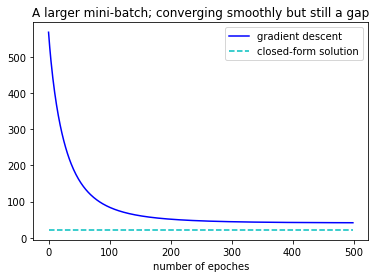

In [35]:
import matplotlib.pyplot as plt

op = Optimizer(lr=0.001, annealing_rate=0.99, batch_size=30, max_epochs=500)

w, errors = ridge_regression_gd(data_wb, target, op)

plt.title('A larger mini-batch; converging smoothly but still a gap')
plt.xlabel('number of epoches')
plt.plot(errors, 'b', 21.89*np.ones(errors.shape[0]), 'c--')
plt.legend(['gradient descent', 'closed-form solution'])

epoch=0: the mean square error is 347.34890515472614
epoch=1: the mean square error is 217.87472093345355
epoch=2: the mean square error is 141.49162989289766
epoch=3: the mean square error is 95.70762357308615
epoch=4: the mean square error is 67.89762941582175
epoch=5: the mean square error is 50.97810617928628
epoch=6: the mean square error is 40.59201436815758
epoch=7: the mean square error is 34.179208793859424
epoch=8: the mean square error is 30.122750781055966
epoch=9: the mean square error is 27.583358237092998
epoch=10: the mean square error is 25.959491441365802
epoch=11: the mean square error is 24.916673583735577
epoch=12: the mean square error is 24.228643360030336
epoch=13: the mean square error is 23.76137511495741
epoch=14: the mean square error is 23.448612818621545
epoch=15: the mean square error is 23.238008494007445
epoch=16: the mean square error is 23.086710845986676
epoch=17: the mean square error is 22.969194098890725
epoch=18: the mean square error is 22.89625

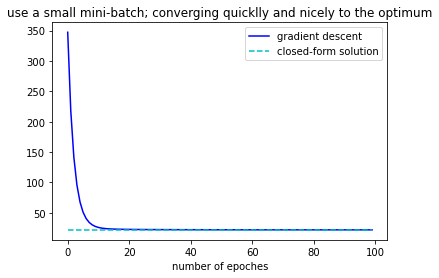

In [36]:
op = Optimizer(lr=0.001, annealing_rate=0.99, batch_size=2, max_epochs=100)

w, errors = ridge_regression_gd(data_wb, target, op)

plt.title('use a small mini-batch; converging quicklly and nicely to the optimum')
plt.xlabel('number of epoches')
plt.plot(errors, 'b', 21.89*np.ones(errors.shape[0]), 'c--')
plt.legend(['gradient descent', 'closed-form solution'])

epoch=0: the mean square error is 340.5009374045614
epoch=1: the mean square error is 211.9718554473748
epoch=2: the mean square error is 136.42712425112472
epoch=3: the mean square error is 91.74625031591225
epoch=4: the mean square error is 65.07294398557373
epoch=5: the mean square error is 48.95321730182729
epoch=6: the mean square error is 38.891196407376015
epoch=7: the mean square error is 32.96237958803716
epoch=8: the mean square error is 29.339239508909532
epoch=9: the mean square error is 27.054678714290247
epoch=10: the mean square error is 25.61798979980691
epoch=11: the mean square error is 24.690727614401307
epoch=12: the mean square error is 24.08419943558765
epoch=13: the mean square error is 23.694342082285896
epoch=14: the mean square error is 23.424588349273073
epoch=15: the mean square error is 23.214918488647886
epoch=16: the mean square error is 23.06852004937892
epoch=17: the mean square error is 22.96299290811426
epoch=18: the mean square error is 22.8736339926

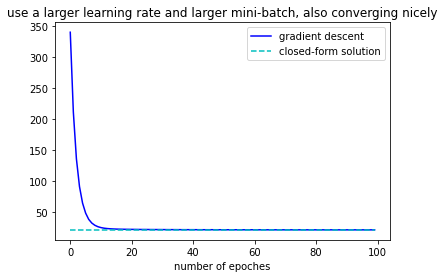

In [24]:
op = Optimizer(lr=0.01, annealing_rate=0.99, batch_size=20, max_epochs=100)

w, errors = ridge_regression_gd(data_wb, target, op)

plt.title('use a larger learning rate and larger mini-batch, also converging nicely')
plt.xlabel('number of epoches')
plt.plot(errors, 'b', 21.89*np.ones(errors.shape[0]), 'c--')
plt.legend(['gradient descent', 'closed-form solution'])

epoch=0: the mean square error is 78.50827898302533
epoch=1: the mean square error is 25.98576926134303
epoch=2: the mean square error is 24.229755692578713
epoch=3: the mean square error is 26.217710192106267
epoch=4: the mean square error is 22.93308979478208
epoch=5: the mean square error is 24.285488002031315
epoch=6: the mean square error is 29.153882778345068
epoch=7: the mean square error is 25.650937324144092
epoch=8: the mean square error is 22.895055121631742
epoch=9: the mean square error is 47.4537109415386
epoch=10: the mean square error is 27.672079844178306
epoch=11: the mean square error is 22.65788411697621


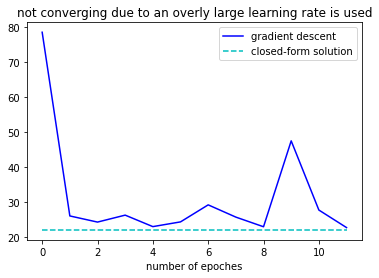

In [39]:
op = Optimizer(lr=0.2, annealing_rate=0.99, batch_size=20, max_epochs=12)

w, errors = ridge_regression_gd(data_wb, target, op)

plt.title('not converging due to an overly large learning rate is used')
plt.xlabel('number of epoches')
plt.plot(errors, 'b', 21.99*np.ones(errors.shape[0]), 'c--')
plt.legend(['gradient descent', 'closed-form solution'])

In [38]:
from sklearn import model_selection
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Create ridge regression object

l_regr = linear_model.Ridge()

# Train the model using the training set

l_regr.fit(data_wb, target)

# Make predictions using the same training set

predict = l_regr.predict(data_wb)

# The mean squared error

print("Mean squared error: %.5f" % mean_squared_error(target, predict))

Mean squared error: 21.89586
